# Python Exam

## Loading the CSV File

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MD_agric_exam-4313.csv')
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [3]:
df.columns

Index(['Field_ID', 'Elevation', 'Rainfall', 'Min_temperature_C',
       'Max_temperature_C', 'pH', 'Pollution_level', 'Plot_size',
       'Annual_yield', 'Crop_type'],
      dtype='object')

## Questions on Python

In [4]:
# Unique crop types in the dataset
df['Crop_type'].nunique()

8

In [5]:
# maximum annual yield for "wheat" crop type in the dataset
df.groupby('Crop_type')['Annual_yield'].max()


Crop_type
banana      7.438521
cassava     7.728858
coffee      7.358089
maize       8.649657
potato      8.873741
rice       10.512780
tea        12.695224
wheat       8.994376
Name: Annual_yield, dtype: float64

In [6]:
round(df[df['Crop_type'] == 'wheat']['Annual_yield'].max(), 2)

8.99

In [7]:
#Total rainfall for crop types where the average pollution level is above 0.2.
df[df['Pollution_level'] > 0.2]['Rainfall'].sum()

478902.6

In [8]:
def calc_temp_diff(df, field_ids):
    """
     function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field
    """
    temp_diff_list = []  # Create an empty list to store temperature differences

    for field_id in field_ids:
        # Filter the DataFrame for the specified Field_ID
        filtered_df = df[df['Field_ID'] == field_id]
        
        if not filtered_df.empty:
            # Calculate temperature difference for the filtered DataFrame
            max_temp = filtered_df['Max_temperature_C'].iloc[0]
            min_temp = filtered_df['Min_temperature_C'].iloc[0]
            temp_diff = max_temp - min_temp
            temp_diff_list.append((field_id, temp_diff))  # Append the tuple to the list
        else:
            temp_diff_list.append((field_id, "Temperature data not available"))

    return temp_diff_list

# Field IDs for which temperature difference needs to be calculated
field_ids = [1458, 1895, 5443]

# Call the function with the DataFrame and field IDs
result = calc_temp_diff(df, field_ids)
result


[(1458, 40.7), (1895, 35.7), (5443, 33.4)]

In [9]:
# Identify the crop type with the lowest average minimum temperature.
a = df['Crop_type'].unique()
b = float('inf')
c = ''
for crop in a:
    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()
    if d < b:
        b = d
        c = crop
print(c)

rice


In [10]:
#calculate the total plot size for plots where the pH is less than 5.5.
df[df['pH']< 5.5]['Plot_size'].sum()

1731.8999999999999

In [11]:
# create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30.
filt_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]
filt_df.shape

(319, 10)

In [13]:
import numpy as np

In [14]:
#calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset
med_plot_size = df['Plot_size'].median()
plot = df[df['Plot_size'] > med_plot_size]
np.std(plot['Rainfall'])

469.6199685856172

In [36]:
#the most common ‘Max_temperature_C’ 
df['Max_temperature_C'].value_counts()

Max_temperature_C
30.7    26
31.0    25
30.5    24
31.5    23
30.2    22
        ..
35.8     1
26.3     1
35.2     1
35.7     1
37.3     1
Name: count, Length: 100, dtype: int64

In [15]:
# least common 'Crop_type', 
df['Crop_type'].value_counts(ascending=True)

Crop_type
rice        48
maize       82
coffee      99
banana     103
tea        137
cassava    141
potato     146
wheat      244
Name: count, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def categorize_elevation(elevation):
    """
    function to categorize elevation
    """
    if elevation < 300:
        return 'Low'
    elif 300 <= elevation <= 600:
        return 'Medium'
    else:
        return 'High'

df['Elevation_range'] = df['Elevation'].apply(categorize_elevation)


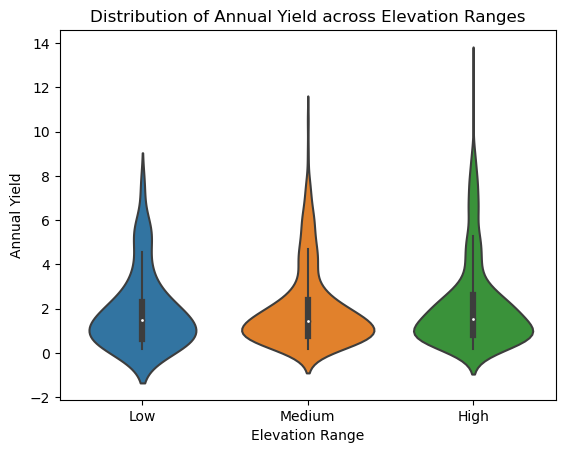

In [19]:
#create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges
sns.violinplot(x='Elevation_range', y='Annual_yield', data=df, order=['Low', 'Medium', 'High'])

plt.title('Distribution of Annual Yield across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield');

In [30]:
# recursive function to sum the integer values for each unique crop type in the dataset
crop_types = df['Crop_type'].drop_duplicates().tolist()
def sum_crop_lengths(crops, index=0):
    if index == len(crops):
        return 0
    else:
        return len(crops[index]) + sum_crop_lengths(crops, index + 1)
        
total_length = sum_crop_lengths(crop_types)
print(total_length)

42


In [31]:
# t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types

from scipy import stats
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

t_stat, p_value = stats.ttest_ind(coffee_yield, banana_yield)
print(round(p_value, 3))

0.598
